# 2022 NZMSA Data Science Submission.

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

%matplotlib inline

# Exploratory Data Analysis.
- From MM2, include center spread, skew and EOV check

In [4]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [5]:
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


It can be seen that the peak wind direction has no valid stations that contain data on this field and with very few containing information on gust. There are also some valid stations that do not have data for tmpc, dwpc, relh and sknt.

In [27]:
dFrame = pd.DataFrame(dataset)
dFrame.pop("gust")
dFrame.pop("peak_wind_drct")
dFrame['tmpc'].replace('', np.nan, inplace=True)
dFrame['dwpc'].replace('', np.nan, inplace=True)
dFrame['relh'].replace('', np.nan, inplace=True)
dFrame['sknt'].replace('', np.nan, inplace=True)
dFrame = dFrame.dropna()
dFrame['valid'] = pd.to_datetime(dFrame['valid'])
dFrame.info()
print(dFrame['valid'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0    station  103584 non-null  object        
 1   valid     103584 non-null  datetime64[ns]
 2   tmpc      103584 non-null  float64       
 3   dwpc      103584 non-null  float64       
 4   relh      103584 non-null  float64       
 5   sknt      103584 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.5+ MB
0        2015-01-01 00:00:00
1        2015-01-01 00:30:00
2        2015-01-01 01:00:00
3        2015-01-01 01:30:00
4        2015-01-01 02:00:00
                 ...        
103708   2020-12-30 21:30:00
103709   2020-12-30 22:00:00
103710   2020-12-30 22:30:00
103711   2020-12-30 23:00:00
103712   2020-12-30 23:30:00
Name: valid, Length: 103584, dtype: datetime64[ns]


<AxesSubplot:>

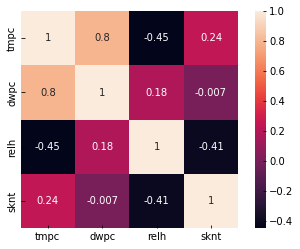

In [14]:
sns.heatmap(dFrame.corr(), annot=True, square =True)

/var/folders/xj/_s68zhld5zbbwgjgdpj9ww5m0000gn/T/ipykernel_6096/2274655541.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


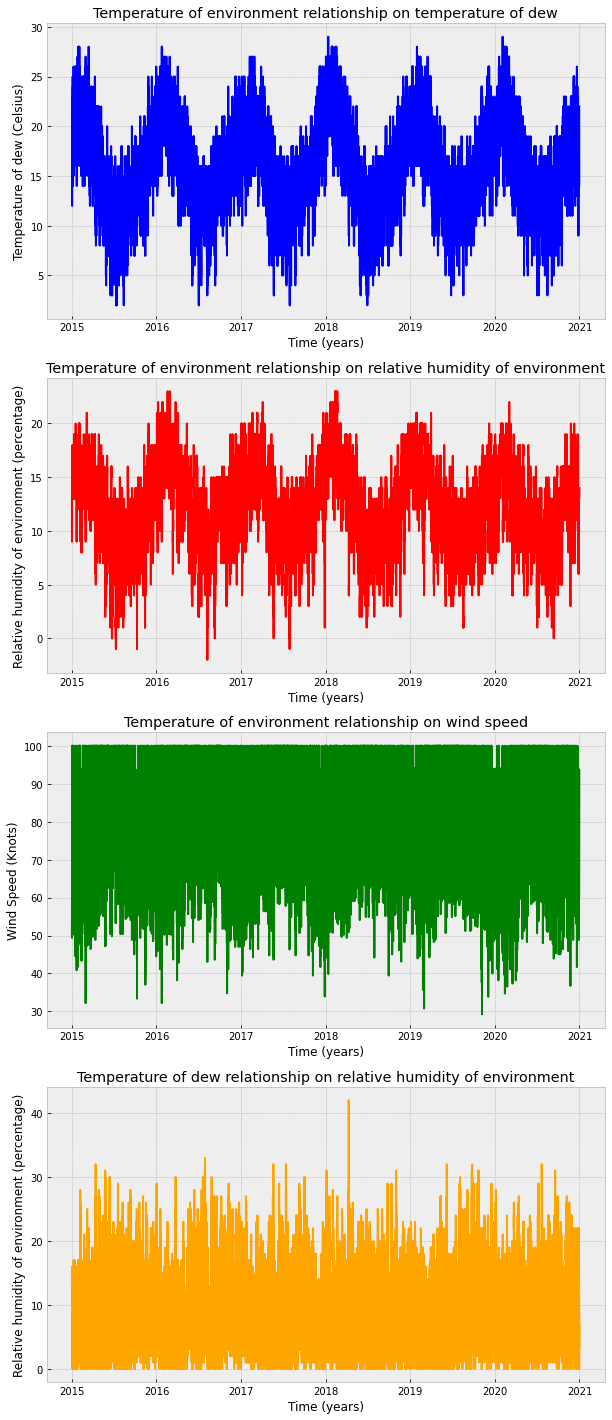

In [24]:
plt.style.use("bmh")
fig, (tmpc, dwpc, relh, sknt) = plt.subplots(nrows=4, ncols=1, squeeze=True)

tmpc.plot(dFrame["valid"], dFrame["tmpc"], color="blue")
tmpc.set_title("Temperature of environment relationship on temperature of dew")
tmpc.set_xlabel("Time (years)")
tmpc.set_ylabel("Temperature of dew (Celsius)")

dwpc.plot(dFrame["valid"], dFrame["dwpc"], color="red")
dwpc.set_title("Temperature of environment relationship on relative humidity of environment")
dwpc.set_xlabel("Time (years)")
dwpc.set_ylabel("Relative humidity of environment (percentage)")

relh.plot(dFrame["valid"], dFrame["relh"], color="green")
relh.set_title("Temperature of environment relationship on wind speed")
relh.set_xlabel("Time (years)")
relh.set_ylabel("Wind Speed (Knots)")

sknt.plot(dFrame["valid"], dFrame["sknt"], color="orange")
sknt.set_title("Temperature of dew relationship on relative humidity of environment")
sknt.set_xlabel("Time (years)")
sknt.set_ylabel("Relative humidity of environment (percentage)")

fig.set_size_inches(10,25)

fig.show()

# EDA Comments
Overall, with the data provided, there is an interesting trend on temperature of the environment overtime representing an oscillating cosine wave. The others tend to a follow a very similar trend with one another . Through the correlation plot, it suggests that there is a strong correlation/relationship with the temperature of the environment with the temperature of the dew point

# Data Processing
As done in the Exploratory Analysis, the gust and peak wind direction fields were deemed useless due to having limited data on the given fields. Within this analysis the removal of other points of data were deemed acceptable as these particular data did include missing fields.

In [58]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html
valid_train, valid_test, temp_train, temp_test = train_test_split(dataset[['valid']], dataset["tmpc"], test_size=0.2)

In [59]:
valid_train.info()
valid_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 51605 to 8331
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   valid   82970 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 4383 to 16714
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   valid   20743 non-null  object
dtypes: object(1)
memory usage: 324.1+ KB


In [60]:
temp_train.info()
temp_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 82970 entries, 51605 to 8331
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
82942 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
<class 'pandas.core.series.Series'>
Int64Index: 20743 entries, 4383 to 16714
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
20736 non-null  float64
dtypes: float64(1)
memory usage: 324.1 KB


# Data Modelling

In [53]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.
time, temp = make_regression(n_samples=10000, n_features=10, noise=100, random_state=75)

trainX, testX, trainY, testY = train_test_split(time, temp, test_size=0.2)
model = LinearRegression()
model.fit(trainX, trainY)

LinearRegression()

In [55]:
model.score(testX,testY)

0.7744247550160769

In [62]:
predictMonth = pd.to_datetime("2021-01-01 00:00")
print(predictMonth)
model.predict(predictMonth)

2021-01-01 00:00:00


ValueError: Expected 2D array, got scalar array instead:
array=2021-01-01 00:00:00.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.